# AI Fundamentals - Assignment 3

This assignment requires you to use [Tensorflow](https://www.tensorflow.org) and [Keras](https://keras.io/). Keras is a high-level Deep Learning API written in Python working as an interface to TensorFlow.

This assignment is divided in two parts. In the first part you will learn about Keras with the help of the example below and the Keras [documentation](https://keras.io/). In the second part, you will practise training a Deep Learning model.

## How to submit
Submit by uploading this notebook to Canvas. It should include **plots**, **results** and **code** showing how the results were genereated.  Remember to name your file(s) appropriately.
It is due on 11:59 of December 9, 2020.

## Installation
Instructions can be found here:
* [Tensorflow](https://www.tensorflow.org/install/)

Since Tensorflow 2.0, Keras is included in Tensorflow and will be automatically installed with Tensorflow. It can be accessed as ```tensorflow.keras```

I recommend using ```pip```. For Tensorflow is it sufficient to install the CPU version. The GPU version requires a good workstation with high-end Nvidia GPU(s), and it is not necessary for this tutorial.

If you're using a virtualenv:
```
pip3 install tensorflow
```
Add ```sudo``` for a systemwide installation (i.e. no ```virtualenv```).
```
sudo pip3 install tensorflow
```
Make sure that you have ```sklearn```, ```matplotlib``` and ```numpy``` installed, too.


## Part 1 - understand a model

### Optimizers

Loss is the penalty for a bad prediction. That is, loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater than zero. The goal of training a model is to find a set of weights and biases (i.e. parameters) that have, on average, a low loss across all examples. The term cost is used interchangably with loss. See the [loss section](https://keras.io/losses/) in the Keras documentation for a list and descriptions of what is available.

![Side by side loss](https://drive.google.com/uc?id=1DdbQEQLCLCSw4uPsuf0C1nJCfUICT0Ae)
<b>Figure 1.</b> Left: high loss and right: low loss.

<!-- https://drive.google.com/file/d/1DdbQEQLCLCSw4uPsuf0C1nJCfUICT0Ae/view?usp=sharing
<img src="./fig/LossSideBySide.png" width="500">
<figcaption>Figure. Left: high loss and right: low loss.</figcaption>
 -->
The optimizer is the algorithm used to minimize the loss/cost. Optimizers in neural networks work by finding the gradient/derivative of the loss with respect to the parameters (i.e. the weights). "Gradient" is the correct term since a we are looking at multi-dimensional systems (i.e. many parameters), however, the terms are often used interchangably. For those who didn't take multivariate calculus, just think of the gradient as a derivative. The derivative of the loss with respect to a parameters tells us how much the loss changes when we nudge a weight up or down. So, by knowing how a given parameter affects the loss the optimizer can change it so as to decrease the loss. The various optimizers differ in how they change the weights. 

#### Mini-overview over popular optimizers

* **Stochastic Gradient Descent (SGD)**. This is the most basic and easy to understand optimizer. It updates the weights in the negative direction of the gradient by taking the average gradient of mini-batch of data (e.g. 20-1000 examples) in each step. Vanilla SGD only has one hyper-parameter, the learning rate.
* **Momentum**. This optimizer "gains speed" when the gradient has pointed in the same direction for several consecutive updates. That is, it has a momentum and want to keep moving in that direction. It gains momentum by accumulating an exponentially decaying moving average of past gradients. The step size depends on how large and aligned the sequence of gradients are. The most important hyper-parameter is alpha and common values are 0.5 and 0.9.
* **Nesterov Momentum**. This is a modification of the standard momentum optimizer.
* **AdaGrad**. This optimizer Ada-ptively sets the learning rate depending on the steepness/magnitude of the Grad-ients. This is done so that weights with big gradients get a smaller effective learning rate, and weights with small gradients will get a greater effective learning rate. The result is quicker progress in the more gently sloped directions of the weight space and a slowdown in stepp regions.
* **RMSProp**. This is modification of AdaGrad, where the accumulated gradient decays, that is, the influence of previous gradients gradually decreases.
* **Adam**. The name comes from "adaptive moments", and it is a combination of RMSProp and momentum. It has several hyper-parameters.

The above list just gives a quick overview of some of the most common. However, old optimizers are constantly improved and new are developed. SGD and momentum are most basic and easiest to understand and implement. They are still in use, but the more advanced optimizers tend to be better for practical use. Which one to use is generally an emperical question depending on both the data and the model.

For a more complete overview of optimization algorithms see [this comparison](http://ruder.io/optimizing-gradient-descent/), and to see what is available in Keras, see the [optimizer section](https://keras.io/optimizers/) of the documentation.

See the images below for a comparison of optimizers in a 2D space (NAG: Nesterov accelerated gradient, Adadelta: an extension of AdaGrad).

![Contours - optimizer comparison](https://drive.google.com/uc?id=1CmrD-UPZ7EIUjRuO_ib7k9CL1FO2bbLk)
<b>Figure 2.</b> Comparison of six different optimizers.


![Saddle point - optimizer comparison](https://drive.google.com/uc?id=1QVhN9rAvCjXtGyNZkmFivyyCzNsntObh)
<b>Figure 3.</b> Comparison of six different optimizers at a saddle point.

<!-- <img src="./fig/contours_evaluation_optimizers.gif" width="500">
<img src="./fig/saddle_point_evaluation_optimizers.gif" width="500"> -->

In [ ]:
###!pip install -U --ignore-installed wrapt enum34 simplejson netaddr

In [ ]:
# imports
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# for the random seed
import tensorflow as tf

# set the random seeds to get reproducible results
np.random.seed(1)
tf.random.set_seed(2)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = X[:1000], y[:1000]


In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(1000, 784)

In [ ]:
y

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3',
       '6', '1', '7', '2', '8', '6', '9', '4', '0', '9', '1', '1', '2',
       '4', '3', '2', '7', '3', '8', '6', '9', '0', '5', '6', '0', '7',
       '6', '1', '8', '7', '9', '3', '9', '8', '5', '9', '3', '3', '0',
       '7', '4', '9', '8', '0', '9', '4', '1', '4', '4', '6', '0', '4',
       '5', '6', '1', '0', '0', '1', '7', '1', '6', '3', '0', '2', '1',
       '1', '7', '9', '0', '2', '6', '7', '8', '3', '9', '0', '4', '6',
       '7', '4', '6', '8', '0', '7', '8', '3', '1', '5', '7', '1', '7',
       '1', '1', '6', '3', '0', '2', '9', '3', '1', '1', '0', '4', '9',
       '2', '0', '0', '2', '0', '2', '7', '1', '8', '6', '4', '1', '6',
       '3', '4', '5', '9', '1', '3', '3', '8', '5', '4', '7', '7', '4',
       '2', '8', '5', '8', '6', '7', '3', '4', '6', '1', '9', '9', '6',
       '0', '3', '7', '2', '8', '2', '9', '4', '4', '6', '4', '9', '7',
       '0', '9', '2', '9', '5', '1', '5', '9', '1', '2', '3', '2

In [ ]:
X = X.reshape(X.shape[0], 28, 28, 1)
# Normalize
X = X / 255
# number of unique classes
num_classes = len(np.unique(y))
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

num_tot = y.shape[0]
num_train = y_train.shape[0]
num_test = y_test.shape[0]

y_oh = np.zeros((num_tot, num_classes))
y_oh[range(num_tot), y] = 1

y_oh_train = np.zeros((num_train, num_classes))
y_oh_train[range(num_train), y_train] = 1

y_oh_test = np.zeros((num_test, num_classes))
y_oh_test[range(num_test), y_test] = 1

In [ ]:
y_oh

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(1000, 28, 28, 1)

### Question 1
**The data set**

Plot a three examples from the data set.

* What type of data are in the data set?

    <span style="color:red"> The data set stores 1000 examples of a 28x28 pixels image from number 0 to number 9 </span>
    

* What does the line ```X = X.reshape(X.shape[0], 28, 28, 1)``` do?

    <span style="color:red">  X.reshape(X.shape[0], 28, 28, 1) Reshape X from 1000rows x 784columns to 1000 rows of (28x28 matrix)</span>



Look at how the encoding of the targets (i.e. ```y```) is changed. E.g. the lines
```
    y_oh = np.zeros((num_tot, num_classes))
    y_oh[range(num_tot), y] = 1
```
Print out a few rows of ```y``` next to ```y_oh```.

In [ ]:
for i in range(20):
    print("y: ", y[i], "      y_oh: ", y_oh[i])

y:  5       y_oh:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y:  0       y_oh:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y:  4       y_oh:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y:  1       y_oh:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y:  9       y_oh:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
y:  2       y_oh:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
y:  1       y_oh:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y:  3       y_oh:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
y:  1       y_oh:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y:  4       y_oh:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y:  3       y_oh:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
y:  5       y_oh:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y:  3       y_oh:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
y:  6       y_oh:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
y:  1       y_oh:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y:  7       y_oh:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
y:  2       y_oh:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
y:  8       y_oh:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
y:  6       y_oh:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
y:  9       y_oh:  [0. 0. 0. 0.


* What is the relationship between ```y``` and ```y_oh```?

    <span style="color:red"> y_oh is the representation array of y, its length equal to the classes of y , and filled with zeros.  We can see the '1''s index of y_oh equals to the y value.</span>
    
    
* What is the type of encoding in ```y_oh``` called and why is it used?

    <span style="color:red"> One Hot Encoding.  One hot encoding allows us to convert categorical data to be more expressive numbers since some machine learning algorithms cannot work with categorical data directly. When we are working with categorical data ,we can encoded by one hot encoding so we can analyze categorical crossentropy loss. </span>
    
    
* Plot three data examples in the same figure and set the correct label as title. 
    * It should be possible to see what the data represent.

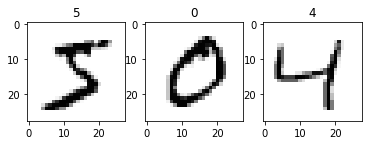

In [ ]:
for i in range(0,3):
    img = X[i].reshape((28,28))
    plt.subplot(131+i)
    plt.imshow(img, cmap="Greys")
    plt.title(y[i])
plt.show()

### Question 2
**The model**

Below is some code for bulding and training a model with Keras.
* What type of network is implemented below? I.e. a normal MLP, RNN, CNN, Logistic Regression...?

    <span style="color:red"> CNN </span>
    
    
* What does ```Dropout()``` do?

    <span style="color:red">  Dropout Layer randomly sets input units to 0 with a frequency of rate at each step during training time to reduce overfitting </span>


* Which type of activation function is used for the hidden layers?

    <span style="color:red"> RELU </span>


* Which type of activation function is used for the output layer?

    <span style="color:red"> Softmax </span>


* Why are two different activation functions used?

    <span style="color:red"> Hidenlayers have many neurons, RELU's simplicity can increase the speed. For output layer,we can not use RELU here which will generate 0 or 1, since we need multiclass classification,we need Softmax function to generate probability distribution containing different probability values for different classes,  </span>


* What optimizer is used in the model below?

    <span style="color:red"> SGD,Stochastic gradient descent Optimizer </span>


* How often are the weights updated (i.e. after how many data examples)?

    <span style="color:red"> learning rate is 0.01 so weights are updated after 1% of data examples. in this case train data has 800 examples, so weight will be updated every 8 examples </span>


* What loss function is used?

    <span style="color:red"> This case need a Multi-Class Classification Loss Function, here it used Categorical Cross-Entropy as loss function which can  compute how bad the model performs.</span>


* How many parameters (i.e. weights and biases, NOT hyper-parameters) does the model have?
    <span style="color:red"> Conv2d_1:16 * 3 * 3+16=160 Conv2d_2:16 * 32 * 3 * 3+32 =4640 Dense_1= 5 * 5 * 32 * 128 +128=102528 Dens2= 128 * 10 +10 =1290
Other layers:0  Total:108618</span>


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Train the model
model.fit(X_train, y_oh_train, batch_size=32, epochs=60)

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Epoch 1/60
25/25 [==============================] - 0s 19ms/step - loss: 2.1367
Epoch 2/60
25/25 [==============================] - 0s 19ms/step - loss: 1.0638
Epoch 3/60
25/25 [==============================] - 0s 20ms/step - loss: 0.5037
Epoch 4/60
25/25 [==============================] - 0s 19ms/step - loss: 0.3274
Epoch 5/60
25/25 [==============================] - 0s 19ms/step - loss: 0.2436
Epoch 6/60
25/25 [==============================] - 0s 19ms/step - loss: 0.1925
Epoch 7/60
25/25 [==============================] - 0s 19ms/step - loss: 0.1752
Epoch 8/60
25/25 [==============================] - 0s 19ms/step - loss: 0.1191
Epoch 9/60
25/25 [==============================] - 0s 19ms/step - loss: 0.0964
Epoch 10/60
25/25 [==============================] - 0s 19ms/step - loss: 0.0674
Epoch 11/60
25/25 [==============================] - 0s 19ms/step - loss: 0.0534
Epoch 12/60
25/25 [==============================] - 0s 19ms/step - loss: 0.0434
Epoch 13/60
25/25 [==================

In [ ]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

## Part 2 - train a model

A model's performance depends on many factors apart from the model architecture (e.g. type and number of layers) and the dataset. Here you will get to explore some of the factors that affect model performance. Much of the skill in training deep learning models lies in quickly finding good values/options for these choises.

In order to observe the learning process it is best to compare the training set loss with the loss on the test set. How to visualize these variables with Keras is described under [Training history visualization](https://keras.io/visualization/#training-history-visualization) in the documentation.

You will explore the effect of 1) optimizer, 2) training duration, and 3) dropout (see the question above).

When training, an **epoch** is one pass through the full training set.



### Question 3

* **Vizualize the training**. Use the model above to observe the training process. Train it for 150 epochs and then plot both "loss" and "val_loss" (i.e. loss on the valiadtion set, here the terms "validation set" and "test set" are used interchangably, but this is not always true). What is the optimal number of epochs for minimizing the test set loss? 
    * Remember to first reset the weights (```model.reset_states()```), otherwise the training just continues from where it was stopped earlier.


In [ ]:
model.reset_states()

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd)
# Train the model

history = model.fit(X_train, y_oh_train,validation_data=(X_test,y_oh_test),batch_size=32, epochs=150)

# Evaluate performance

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Epoch 1/150
25/25 [==============================] - 1s 26ms/step - loss: 2.1279 - val_loss: 1.7812
Epoch 2/150
25/25 [==============================] - 1s 21ms/step - loss: 1.0279 - val_loss: 0.7918
Epoch 3/150
25/25 [==============================] - 1s 21ms/step - loss: 0.5010 - val_loss: 0.4853
Epoch 4/150
25/25 [==============================] - 1s 21ms/step - loss: 0.3316 - val_loss: 0.3674
Epoch 5/150
25/25 [==============================] - 1s 21ms/step - loss: 0.2474 - val_loss: 0.4285
Epoch 6/150
25/25 [==============================] - 1s 21ms/step - loss: 0.2228 - val_loss: 0.3760
Epoch 7/150
25/25 [==============================] - 1s 21ms/step - loss: 0.1669 - val_loss: 0.3550
Epoch 8/150
25/25 [==============================] - 1s 21ms/step - loss: 0.1305 - val_loss: 0.3529
Epoch 9/150
25/25 [==============================] - 1s 21ms/step - loss: 0.1018 - val_loss: 0.3083
Epoch 10/150
25/25 [==============================] - 1s 21ms/step - loss: 0.0764 - val_loss: 0.3670

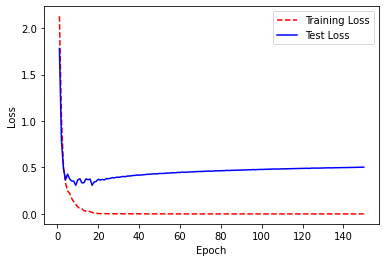

In [ ]:
# Visualize loss history
training_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
Optimal_Number = test_loss.index(min(test_loss)) + 1
print(Optimal_Number)
print(min(test_loss))

17
0.3082735240459442


## What is the optimal number of epochs for minimizing the test set loss? 
<span style="color:red">Answer: As we can see from above, the optimal number of epochs for minimizing the test set loss is 17 (0.3082735240459442)</span>

* **Optimizer**. Select three different optimizers and for each find the close-to-optimal hyper-parameter(s). In your answer, include a) your three choises, b) best hyper-parameters for each of the three optimizers and, c) the code that produced the results.
* *NOTE* that how long the training takes varies with optimizer. I.e., make sure that the model is trained for long enough to reach optimal performance.
* Answer a)
* <span style="color:red"> I select 1)ADAdelta 2)RMSprop 3)Adam </span>

**1 Adadelta Optimizer**

In [ ]:
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import GridSearchCV

def create_model(learning_rate=0.001,rho=0.95,epsilon=1e-6):
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.))

    model.add(Dense(10, activation='softmax'))
    optimizer = Adadelta(learning_rate==learning_rate, rho=rho, epsilon=epsilon)
    # Compile the model
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model
learning_rate=[0.001,0.01,0.1]
rho=[0.95,0.9,0.85]
epsilon = [1e-6,1e-7]
param_grid = dict(learning_rate=learning_rate,rho=rho,epsilon=epsilon) 

# Train the model

model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32,verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_oh_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.934992 using {'epsilon': 1e-06, 'learning_rate': 0.1, 'rho': 0.95}
0.926229 (0.013922) with: {'epsilon': 1e-06, 'learning_rate': 0.001, 'rho': 0.95}
0.921240 (0.010671) with: {'epsilon': 1e-06, 'learning_rate': 0.001, 'rho': 0.9}
0.917486 (0.015974) with: {'epsilon': 1e-06, 'learning_rate': 0.001, 'rho': 0.85}
0.925000 (0.015291) with: {'epsilon': 1e-06, 'learning_rate': 0.01, 'rho': 0.95}
0.928736 (0.015964) with: {'epsilon': 1e-06, 'learning_rate': 0.01, 'rho': 0.9}
0.926229 (0.012507) with: {'epsilon': 1e-06, 'learning_rate': 0.01, 'rho': 0.85}
0.934992 (0.006454) with: {'epsilon': 1e-06, 'learning_rate': 0.1, 'rho': 0.95}
0.929975 (0.018806) with: {'epsilon': 1e-06, 'learning_rate': 0.1, 'rho': 0.9}
0.921245 (0.008140) with: {'epsilon': 1e-06, 'learning_rate': 0.1, 'rho': 0.85}
0.913731 (0.014150) with: {'epsilon': 1e-07, 'learning_rate': 0.001, 'rho': 0.95}
0.912473 (0.020504) with: {'epsilon': 1e-07, 'learning_rate': 0.001, 'rho': 0.9}
0.916233 (0.019508) with: {'epsilon'

**2 RMSprop Optimizer**

In [ ]:
def create_model(learning_rate=0.001,rho=0.95,epsilon=1e-6,momentum=0.0):
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.))

    model.add(Dense(10, activation='softmax'))
    optimizer =RMSprop(learning_rate=learning_rate,rho=rho,momentum=momentum,epsilon=epsilon)
    # Compile the model
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model
learning_rate=[0.001,0.01,0.1]
rho=[0.95,0.9]
epsilon = [1e-6,1e-7]
momentum=[0.0,0.1]
param_grid = dict(learning_rate=learning_rate,rho=rho,epsilon=epsilon,momentum=momentum) 

# Train the model

model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32,verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_oh_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.943731 using {'epsilon': 1e-06, 'learning_rate': 0.01, 'momentum': 0.0, 'rho': 0.9}
0.923737 (0.016907) with: {'epsilon': 1e-06, 'learning_rate': 0.001, 'momentum': 0.0, 'rho': 0.95}
0.924972 (0.017188) with: {'epsilon': 1e-06, 'learning_rate': 0.001, 'momentum': 0.0, 'rho': 0.9}
0.919987 (0.011675) with: {'epsilon': 1e-06, 'learning_rate': 0.001, 'momentum': 0.1, 'rho': 0.95}
0.923742 (0.011634) with: {'epsilon': 1e-06, 'learning_rate': 0.001, 'momentum': 0.1, 'rho': 0.9}
0.926215 (0.023104) with: {'epsilon': 1e-06, 'learning_rate': 0.01, 'momentum': 0.0, 'rho': 0.95}
0.943731 (0.010719) with: {'epsilon': 1e-06, 'learning_rate': 0.01, 'momentum': 0.0, 'rho': 0.9}
0.934997 (0.012377) with: {'epsilon': 1e-06, 'learning_rate': 0.01, 'momentum': 0.1, 'rho': 0.95}
0.938733 (0.019488) with: {'epsilon': 1e-06, 'learning_rate': 0.01, 'momentum': 0.1, 'rho': 0.9}
0.091258 (0.008915) with: {'epsilon': 1e-06, 'learning_rate': 0.1, 'momentum': 0.0, 'rho': 0.95}
0.111266 (0.010920) with: {

**3 Adam Optimizer**

In [ ]:
def create_model(learning_rate=0.001,epsilon=1e-6):
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.))

    model.add(Dense(10, activation='softmax'))
    optimizer =Adam(learning_rate=learning_rate,epsilon=epsilon)
    # Compile the model
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model
learning_rate=[0.001,0.01,0.1]
epsilon = [1e-6,1e-7]
param_grid = dict(learning_rate=learning_rate,epsilon=epsilon) 

# Train the model

model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32,verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_oh_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.941244 using {'epsilon': 1e-06, 'learning_rate': 0.01}
0.912478 (0.013956) with: {'epsilon': 1e-06, 'learning_rate': 0.001}
0.941244 (0.012763) with: {'epsilon': 1e-06, 'learning_rate': 0.01}
0.111266 (0.010920) with: {'epsilon': 1e-06, 'learning_rate': 0.1}
0.916256 (0.006994) with: {'epsilon': 1e-07, 'learning_rate': 0.001}
0.939990 (0.013378) with: {'epsilon': 1e-07, 'learning_rate': 0.01}
0.117508 (0.004879) with: {'epsilon': 1e-07, 'learning_rate': 0.1}


### 3 Optimizers Summary

<span style="color:red"> 
*Answer b) 

*   Best for RMSprop 0.943731 using {'epsilon': 1e-06, 'learning_rate': 0.01, 'momentum': 0.0, 'rho': 0.9}
*   Best for Adam: 0.941244 using {'epsilon': 1e-06, 'learning_rate': 0.01}

*   Best for Adadelta: 0.934992 using {'epsilon': 1e-06, 'learning_rate': 0.1, 'rho': 0.95}



</span>

* **Dropout**. Use the best optimizer and do hyper-parameter seach and find the best value for ```Dropout()```.

In [ ]:

from keras.layers import Dropout
from keras.constraints import maxnorm

def base_model(dropout_rate=0.0):
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation='softmax'))
    #Best optimizer with tuned parameters
    optimizer=RMSprop(epsilon=1e-07,learning_rate=0.01,momentum=0.0,rho=0.9)
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='RMSprop',metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=base_model, epochs=150, batch_size=32, verbose=0)
# define the grid search parameters
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train,y_oh_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.948725 using {'dropout_rate': 0.7}
0.923747 (0.006406) with: {'dropout_rate': 0.0}
0.937503 (0.012344) with: {'dropout_rate': 0.1}
0.933715 (0.019824) with: {'dropout_rate': 0.2}
0.929975 (0.016976) with: {'dropout_rate': 0.3}
0.939986 (0.013405) with: {'dropout_rate': 0.4}
0.941229 (0.015790) with: {'dropout_rate': 0.5}
0.942492 (0.006445) with: {'dropout_rate': 0.6}
0.948725 (0.014575) with: {'dropout_rate': 0.7}
0.921236 (0.015970) with: {'dropout_rate': 0.8}
0.771296 (0.035806) with: {'dropout_rate': 0.9}


* Best dropout rate is 0.7

* **Best model**. Combine the what you learned from the above three questions to build the best model. How much better is it than the worst and average models?

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))

model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_oh_train,validation_data=(X_test,y_oh_test),epochs=150, batch_size=32)
# Evaluate performance
predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) 
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Epoch 1/150
25/25 [==============================] - 1s 33ms/step - loss: 2.2656 - accuracy: 0.1975 - val_loss: 2.1583 - val_accuracy: 0.4800
Epoch 2/150
25/25 [==============================] - 1s 27ms/step - loss: 1.9508 - accuracy: 0.3200 - val_loss: 1.8882 - val_accuracy: 0.5700
Epoch 3/150
25/25 [==============================] - 1s 27ms/step - loss: 1.7414 - accuracy: 0.3950 - val_loss: 1.6205 - val_accuracy: 0.7000
Epoch 4/150
25/25 [==============================] - 1s 25ms/step - loss: 1.4435 - accuracy: 0.5412 - val_loss: 1.3567 - val_accuracy: 0.7500
Epoch 5/150
25/25 [==============================] - 1s 26ms/step - loss: 1.3648 - accuracy: 0.5437 - val_loss: 1.2247 - val_accuracy: 0.7850
Epoch 6/150
25/25 [==============================] - 1s 26ms/step - loss: 1.2040 - accuracy: 0.5900 - val_loss: 1.0424 - val_accuracy: 0.7700
Epoch 7/150
25/25 [==============================] - 1s 26ms/step - loss: 1.1303 - accuracy: 0.6125 - val_loss: 0.9668 - val_accuracy: 0.7700
Epoch 

<span style="color:red"> Final model accuracy 0.965: RMSprop with dropout(0.7) compared with Adam: 0.941244 ,Adadelta: 0.934992

* Average Models Accuracy of 3 optimizer:  0.947 , the final best model accuracy is 0.018 higher than average accuracy

* Worst Model: Adam: 0.934992, the final best accuracy is 0.03 higher than the  worst model.


</span>

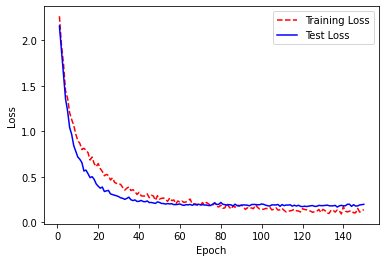

In [ ]:
# Visualize loss history
training_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

* We can see after epoch=80, test loss is greater than training loss

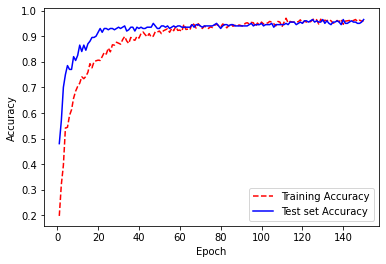

In [ ]:
# Visualize accuracy vs val_accuracy history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epoch_count = range(1, len(accuracy) + 1)
plt.plot(epoch_count, accuracy, 'r--')
plt.plot(epoch_count, val_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test set Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In our final model, as we can see from picture, before epoch=80 training accuracy is always greater than test accuracy. Because we have a high dropout rate(0.7 compared with 0.0 previously) which will disable neurons and sample is lost, then subsequent layers attempt to construct the output based on incomplete input.  

After epoch reach to 80+, during validation all of the sample are available, so the cnn has its full computational power so the test accuracy may be greater than training accuracy, so test set might perform a little better than training set after full computational power. The loss of test set is higher because it has a smaller size than training set.

In [ ]:

unique1, counts1 = np.unique(y_train, return_counts=True)
print(dict(zip(unique1, counts1/len(y_train))))


{0: 0.09625, 1: 0.1075, 2: 0.10375, 3: 0.0925, 4: 0.11125, 5: 0.08625, 6: 0.0875, 7: 0.12125, 8: 0.08875, 9: 0.105}


In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts/len(y_test))))

{0: 0.1, 1: 0.15, 2: 0.08, 3: 0.095, 4: 0.08, 5: 0.115, 6: 0.12, 7: 0.1, 8: 0.08, 9: 0.08}


In [ ]:
unique2, counts2 = np.unique(y, return_counts=True)
print(dict(zip(unique2, counts2/len(y))))

{0: 0.097, 1: 0.116, 2: 0.099, 3: 0.093, 4: 0.105, 5: 0.092, 6: 0.094, 7: 0.117, 8: 0.087, 9: 0.1}


* **Results on the test set**. When doing this search for good model configuration/hyper-parameter values, the data set was split into *two* parts: a training set and a test set (the term "validation" was used interchangably wiht "test"). For your final model, is the performance (i.e. accuracy) on the test set representative for the performance one would expect on a previously unseen data set (drawn from the same distribution)? Why?

    <span style="color:red"> 
    * Answer: 
    
    * From above figures, we can see training accuracy and test accuracy reach almost the same optimal value, and also test set and train set have close distribution of 10 digits which can reflect the distribution of the whole datasets, so the performance on the test set can representative for the performance one would expect on a previously unseen data set drawn from the same distribution.
    * If we want to have more accurate cross-validation test set, we can use StratifiedKFold() to preserve the percentage of samples for each class. </span>


## Further information
For ideas about hyper-parameter tuning, take a look at the strategies described in the sklearn documentation under [model selection](https://scikit-learn.org/stable/model_selection.html), or in this [blog post](https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html) from TensorFlow. For a more thorough discussion about optimizers see [this video](https://www.youtube.com/watch?v=DiNzQP7kK-s) discussing the article [Descending through a Crowded Valley -- Benchmarking Deep Learning Optimizers](https://arxiv.org/abs/2007.01547).


**Good luck!**